# Predicting Car Prices using K Nearest Neighbors
Soham Sen | Feb 12, 2018

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Import Dataset

In [2]:
cars = pd.read_csv('imports-85.data')

In [3]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Doesn't look like there are headers provided in the dataset. 

In [4]:
ch = "symboling	normalized_losses	make	fuel_type	aspiration	num_doors	body_style	drive_wheels	engine_location	wheel_base	length	width	height	curb_weight	engine_type	num_cylinders	engine_size	fuel_system	bore	stroke	compression_ratio	horsepower	peak_rpm	city_mpg	highway_mpg	price"

colheads = ch.split('\t')

print(colheads)

['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


In [5]:
cars = pd.read_csv('imports-85.data', header=None, names=colheads)

cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Which columns are numeric and can be used as features? 

cars.info()

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

Looks like the int and float variables can be used as features. But there are a couple of ones that are 'objects' that could be features as well. num_doors for example or num_cylinders.

In [7]:
cars.num_doors.value_counts()

four    114
two      89
?         2
Name: num_doors, dtype: int64

In [8]:
cars.num_cylinders.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_cylinders, dtype: int64

The number of doors is really just two or four so probably fine to leave as categorical. Number of cylinders also seems more categorical or not. I'll leave these alone for now. 

the price variable is obviously the target column. 

In [9]:
def convertToNum(x):
    num = 0
    try:
        num = int(x)
    except:
        num = np.nan
    return num

prices = cars.price.apply(convertToNum)

prices = prices.dropna()

Note: the hist function does not handle missing numbers well. [See here](https://stackoverflow.com/questions/20656663/matplotlib-pandas-error-using-histogram) 


(array([ 81.,  45.,  35.,  17.,   6.,   3.,   4.,   7.,   2.,   1.]),
 array([  5118. ,   9146.2,  13174.4,  17202.6,  21230.8,  25259. ,
         29287.2,  33315.4,  37343.6,  41371.8,  45400. ]),
 <a list of 10 Patch objects>)

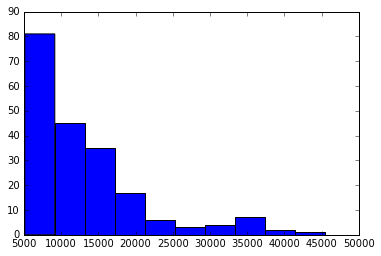

In [10]:
plt.hist(prices)

### Clean Dataset

In [11]:
cars = cars.replace('?', np.nan)

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

Which need to be numeric? 
* price
* horsepower
* peak_rpm
* normalized_losses

In [13]:
convCols=['price', 'horsepower', 'peak_rpm', 'normalized_losses']

for each in convCols:
    cars[each]=cars[each].astype(float)

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nu

In [15]:
cars = cars.select_dtypes(include=[np.number])

In [16]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(9), int64(5)
memory usage: 22.5 KB


Note that there are a numbef of missing values in normalized losses. Probably best to drop the column rather than all the rows since those rows seem to have data in the other columns. 

In [17]:
cars.drop(['normalized_losses'], axis = 1, inplace=True)

In [18]:
cars.dropna(inplace=True)

In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 13 columns):
symboling            199 non-null int64
wheel_base           199 non-null float64
length               199 non-null float64
width                199 non-null float64
height               199 non-null float64
curb_weight          199 non-null int64
engine_size          199 non-null int64
compression_ratio    199 non-null float64
horsepower           199 non-null float64
peak_rpm             199 non-null float64
city_mpg             199 non-null int64
highway_mpg          199 non-null int64
price                199 non-null float64
dtypes: float64(8), int64(5)
memory usage: 21.8 KB


### Normalize

How to normalize between 0 and 1? [StackOverflow](https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range)


In [20]:
norm_cars = (cars - cars.min()) / (cars.max()-cars.min())

In [21]:
norm_cars.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


## Univariate K Nearest Neighbor Models

### Helper Functions


In [22]:
def knn_train_test(traincol, targetcol, df):
    
    #randomize rows
    df.iloc[np.random.permutation(len(df))]
    
    #split data into train (75%) and test (25%)
    cut = int(len(df)/4)
    test = df.iloc[:cut]
    train = df.iloc[cut:]
    
    kvals = [1, 2, 5, 7, 9]
    rmses = []
    for k in kvals:
    # instantiate knn class
        knn = KNeighborsRegressor(algorithm='auto', n_neighbors = k)
    
        # fit 
        knn.fit(train[[traincol]], train[[targetcol]])

        #predict
        predict = knn.predict(test[[traincol]])

        #evaluate
        rmse = mean_squared_error(test[[targetcol]], predict)**(1/2)
        rmses.append(rmse)
        
    return rmses
   

In [23]:
def best_model(dic):
    rmses = []
    for index, val in dic.items():
        rmses.append(val)
    mn = min(rmses)
    
    for index,val in dic.items():
        if val == mn:
            print(index,":", val)
        else:
            pass

In [24]:
def axis_coor(img_num, row_width):
    x = np.ceil(img_num/row_width)
    y = img_num - row_width*(x-1)
    return int(x-1), int(y-1)

#test
#x, y = axis_coor(1,3)
#print(x, y)

### Run across all columns 
Which feature predicted best?



In [25]:
features = norm_cars.columns.tolist()
features.remove('price')
print(features)

['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']


In [26]:
feat_rmse = {}

for featcol in features:
    rmse = knn_train_test(featcol, 'price', norm_cars)
    feat_rmse[featcol] = rmse
    
#print(feat_rmse)
avg_feat_rmse = {}

for key, val in feat_rmse.items():
    avg_feat_rmse[key]=np.mean(val)

best_model(avg_feat_rmse)

engine_size : 0.0875844340698


In [27]:
avg_feat_rmse

{'city_mpg': 0.13799868081612765,
 'compression_ratio': 0.19541741364291493,
 'curb_weight': 0.14193097871865928,
 'engine_size': 0.08758443406979384,
 'height': 0.28433456010871827,
 'highway_mpg': 0.14729912734429126,
 'horsepower': 0.11819128008968263,
 'length': 0.16960745295083712,
 'peak_rpm': 0.29273042726823223,
 'symboling': 0.2986973908020798,
 'wheel_base': 0.25875600413061539,
 'width': 0.1717452750087107}

In [28]:
avg_feat_rmse = pd.DataFrame.from_dict(avg_feat_rmse, orient='index')
avg_feat_rmse.columns = ['rmse']
avg_feat_rmse.sort_values('rmse')

,rmse
engine_size,0.087584
horsepower,0.118191
city_mpg,0.137999
curb_weight,0.141931
highway_mpg,0.147299
length,0.169607
width,0.171745
compression_ratio,0.195417
wheel_base,0.258756
height,0.284335


### Chart: k values on the x axis and root mean squared error on the y. 

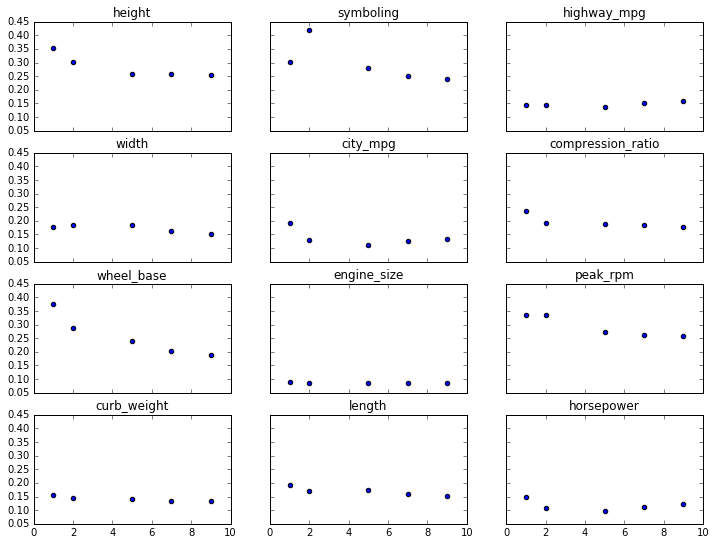

In [29]:
fig, ax = plt.subplots(4,3, sharex='all', sharey='all', figsize=(12,9))
kvals = [1, 2, 5, 7, 9]

i = 1
for key, value in feat_rmse.items():
    x, y = axis_coor(i, 3)
    ax[x,y].scatter(kvals, value)
    ax[x,y].set_title(str(key))
    i+=1

#plt.show()

## Multivariate Models

In [30]:
def knn_train_test_multi(traincol, targetcol, df):
    
    #randomize rows
    df.iloc[np.random.permutation(len(df))]
    
    #split data into train (75%) and test (25%)
    cut = int(len(df)/4)
    test = df.iloc[:cut]
    train = df.iloc[cut:]
    
    # instantiate knn class
    knn = KNeighborsRegressor(algorithm='auto', n_neighbors = 5)
    
    # fit 
    knn.fit(train[traincol], train[[targetcol]])

    #predict
    predict = knn.predict(test[traincol])

    #evaluate
    rmse = mean_squared_error(test[[targetcol]], predict)**(1/2)
            
    return rmse
   

In [31]:
features=['engine_size', 'horsepower']

two_features_mse = knn_train_test_multi(features, 'price', norm_cars)

print(two_features_mse)

0.100262923603


In [32]:
features=['engine_size', 'horsepower', 'city_mpg']

mse = knn_train_test_multi(features, 'price', norm_cars)

print(mse)

0.0758967874443


In [33]:
features=['engine_size', 'horsepower', 'city_mpg', 'curb_weight']

mse = knn_train_test_multi(features, 'price', norm_cars)

print(mse)

0.119273578584


In [34]:
features=['engine_size', 'horsepower', 'city_mpg', 'curb_weight', 'highway_mpg']

mse = knn_train_test_multi(features, 'price', norm_cars)

print(mse)

0.129386166053


So far it looks like three featues, engine size, horsepower and city_mpg produce the best model (lowest rmse). Adding more variables makes the model worse.

### Hyperparameter Optimization

In [35]:
def knn_train_test_multi_k(traincol, targetcol, df):
    
    #randomize rows
    df.iloc[np.random.permutation(len(df))]
    
    #split data into train (75%) and test (25%)
    cut = int(len(df)/4)
    test = df.iloc[:cut]
    train = df.iloc[cut:]
    
    kvals = range(1,26)
    rmses = []
    for k in kvals:
    # instantiate knn class
        knn = KNeighborsRegressor(algorithm='auto', n_neighbors = k)
    
        # fit 
        knn.fit(train[traincol], train[[targetcol]])

        #predict
        predict = knn.predict(test[traincol])

        #evaluate
        rmse = mean_squared_error(test[[targetcol]], predict)**(1/2)
        rmses.append(rmse)
        
    return rmses
   

### Model 1: engine_size, horsepower, city_mpg

Average RMSE 0.108312333334
Lowest RMSE 0.0714219255735
Lowest RMSE k value 6


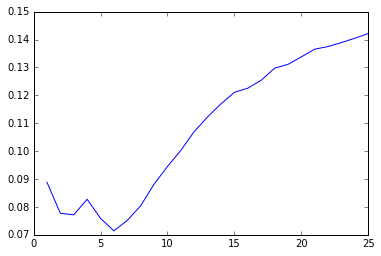

In [36]:
features=['engine_size', 'horsepower', 'city_mpg']
k = range(1,26)
mse = knn_train_test_multi_k(features, 'price', norm_cars)

print('Average RMSE',np.mean(mse))
print('Lowest RMSE', min(mse))
print('Lowest RMSE k value', mse.index(min(mse))+1)

plt.plot(k, mse)

### Model 2: engine_size, horsepower

Average RMSE 0.110370161504
Lowest RMSE 0.0670316420696
Lowest RMSE k value 2


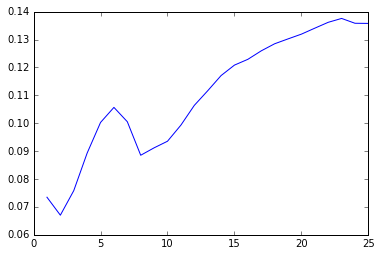

In [37]:
features=['engine_size', 'horsepower']
k = range(1,26)
mse = knn_train_test_multi_k(features, 'price', norm_cars)

print('Average RMSE',np.mean(mse))
print('Lowest RMSE', min(mse))
print('Lowest RMSE k value', mse.index(min(mse))+1)

plt.plot(k, mse)

### Model 3: engine_size, horsepower, city_mpg, curb_weight

Average RMSE 0.129201237825
Lowest RMSE 0.110712843718
Lowest RMSE k value 1


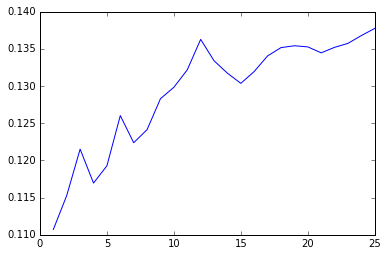

In [38]:
features=['engine_size', 'horsepower', 'city_mpg', 'curb_weight']
k = range(1,26)
mse = knn_train_test_multi_k(features, 'price', norm_cars)

print('Average RMSE',np.mean(mse))
print('Lowest RMSE', min(mse))
print('Lowest RMSE k value', mse.index(min(mse))+1)

plt.plot(k, mse)

If the neighbors are more spread out, then having a higher k will introduce more variability. The concept of neighbor changes depending on how many features are included; and how common those features are. 

### Using k-fold cross validation instead of test/train
Let's evaluate the best model above - model 1 - with k fixed at 6 using k folds cross validation.  

3 folds:  avg RMSE:  0.083395328412 std RMSE :  0.00163791856386
5 folds:  avg RMSE:  0.077095247789 std RMSE :  0.0119882742934
7 folds:  avg RMSE:  0.0738026399845 std RMSE :  0.014497803245
9 folds:  avg RMSE:  0.0693841467634 std RMSE :  0.0176344861684
10 folds:  avg RMSE:  0.0698368104319 std RMSE :  0.0159474968164
11 folds:  avg RMSE:  0.0703081769574 std RMSE :  0.0201596550283
13 folds:  avg RMSE:  0.069510027429 std RMSE :  0.0191105998247
15 folds:  avg RMSE:  0.0685708039036 std RMSE :  0.0232998065191
17 folds:  avg RMSE:  0.0669044086074 std RMSE :  0.0242676162694
19 folds:  avg RMSE:  0.0652288534121 std RMSE :  0.02585612449
21 folds:  avg RMSE:  0.0652279981622 std RMSE :  0.0277540388351
23 folds:  avg RMSE:  0.0647010563221 std RMSE :  0.0285658788781


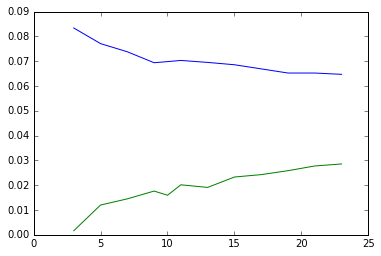

In [42]:
from sklearn.model_selection import cross_val_score, KFold

features=['engine_size', 'horsepower', 'city_mpg']

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
avg_rmses = list()
std_rmses = list()

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor(n_neighbors=6)
    mses = cross_val_score(model, norm_cars[features], norm_cars["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    
    avg_rmse = np.mean(rmses)
    avg_rmses.append(avg_rmse)
    
    std_rmse = np.std(rmses)
    std_rmses.append(std_rmse)
    
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE : ", str(std_rmse))
    
plt.plot(num_folds, avg_rmses)
plt.plot(num_folds, std_rmses)


The model holds up and proves to be a bit better than we though using the k folds validation. 